# NOTE: This was used to interatively develop the actual extraction script.  This may no longer be correct.

Take all of the ACE 2005 data in its custom format and convert to the yaat annotations format

In [1]:
from glob import glob
from io import open
from time import time
import json
import numpy as np
from collections import Counter
import itertools
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pprint import pprint
sb.set_color_codes()
%matplotlib inline

In [2]:
import spacy
nlp = spacy.load('en')

In [3]:
ls ../data/ACE\ 2005/data/English/bc/adj/

CNN_CF_20030303.1900.00.ag.xml*
CNN_CF_20030303.1900.00.apf.xml*
CNN_CF_20030303.1900.00.apf.xml.score*
CNN_CF_20030303.1900.00.sgm*
CNN_CF_20030303.1900.00.tab*
CNN_CF_20030303.1900.02.ag.xml*
CNN_CF_20030303.1900.02.apf.xml*
CNN_CF_20030303.1900.02.apf.xml.score*
CNN_CF_20030303.1900.02.sgm*
CNN_CF_20030303.1900.02.tab*
CNN_CF_20030303.1900.06-1.ag.xml*
CNN_CF_20030303.1900.06-1.apf.xml*
CNN_CF_20030303.1900.06-1.apf.xml.score*
CNN_CF_20030303.1900.06-1.sgm*
CNN_CF_20030303.1900.06-1.tab*
CNN_CF_20030303.1900.06-2.ag.xml*
CNN_CF_20030303.1900.06-2.apf.xml*
CNN_CF_20030303.1900.06-2.apf.xml.score*
CNN_CF_20030303.1900.06-2.sgm*
CNN_CF_20030303.1900.06-2.tab*
CNN_CF_20030304.1900.01.ag.xml*
CNN_CF_20030304.1900.01.apf.xml*
CNN_CF_20030304.1900.01.apf.xml.score*
CNN_CF_20030304.1900.01.sgm*
CNN_CF_20030304.1900.01.tab*
CNN_CF_20030304.1900.02.ag.xml*
CNN_CF_20030304.1900.02.apf.xml*
CNN_CF_20030304.1900.02.apf.xml.score*
CNN_CF_20030304.1900.02.sgm*
CNN_CF_20030304.1900.02.tab*
CNN_CF_2

In [4]:
text_files = glob('../data/ACE 2005/data/English/*/adj/*sgm')[:1]
annotation_files = glob('../data/ACE 2005/data/English/*/adj/*ag.xml')[:1]

In [5]:
for fname in text_files[:1]:
    print fname, "-"*40
    print open(fname, 'r').read()
    
# text = bs(open(fname, 'r').read()).text
text = open(fname, 'r').read().replace("\n", " ")
char_tokens= list(text)

../data/ACE 2005/data/English/bc/adj/CNN_CF_20030303.1900.00.sgm ----------------------------------------
<DOC>
<DOCID> CNN_CF_20030303.1900.00 </DOCID>
<DOCTYPE SOURCE="broadcast conversation"> STORY </DOCTYPE>
<DATETIME> 2003-03-03T19:00:00-05:00 </DATETIME> 
<BODY>
<HEADLINE>
New Questions About Attacking Iraq; Is Torturing Terrorists Necessary?
</HEADLINE>
<TEXT>
<TURN>
<SPEAKER> BEGALA </SPEAKER>
Well, we'll debate that later on in the show. We'll have a couple of
experts come out, so I'll withhold my comments until then. Even as the
secretary of homeland security was putting his people on high alert last
month, a 30-foot Cuban patrol boat with four heavily armed men landed on
American shores, utterly undetected by the Coast Guard Secretary Ridge
now leads. Now, why has our president placed homeland security in the
hands of Republican political hacks instead of professionals, by the way?
Attorney General John Ashcroft, for example, is a career politician. He
lost an election to a 

In [6]:
for fname in annotation_files:
    print fname, "-"*80
    print open(fname, 'r').read()
    
annotation_soup = bs(open(fname, 'r').read())

../data/ACE 2005/data/English/bc/adj/CNN_CF_20030303.1900.00.ag.xml --------------------------------------------------------------------------------
<?xml version="1.0"?>
<!DOCTYPE AGSet SYSTEM "ag-1.1.dtd">
<AGSet id="CNN_CF_20030303.1900.00" version="1.0" xmlns="http://www.ldc.upenn.edu/atlas/ag/" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:dc="http://purl.org/DC/documents/rec-dces-19990702.htm">
<Metadata>
<MetadataElement name="author">LDC</MetadataElement>
<MetadataElement name="encoding">UTF-8</MetadataElement>
<MetadataElement name="source"></MetadataElement>
<MetadataElement name="type">text</MetadataElement>
<MetadataElement name="uri">CNN_CF_20030303.1900.00.sgm</MetadataElement>
<MetadataElement name="version">3.1</MetadataElement>
</Metadata>
<Timeline id="CNN_CF_20030303.1900.00:T1">
<Signal id="CNN_CF_20030303.1900.00:T1:1" mimeClass="text" mimeType="NULL" encoding="unknown" unit="char" xlink:type="simple" xlink:href="URI" track="NULL"></Signal>
</Timeline>
<AG id="C

/Users/thomaseffland/.virtualenvs/research/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


In [7]:
anchors = annotation_soup.find_all('anchor')
print "{} total anchors".format(len(anchors))
print "Some Anchors:"
for a in anchors[:5]:
    print '\t', a
    offset = int(float(a['offset']))
    print '\t\t {}[{}]{}'.format(text[offset-5:offset], text[offset], text[offset+1:offset+6])

1482 total anchors
Some Anchors:
	<anchor id="CNN_CF_20030303.1900.00:1:IK" offset="117.000000"></anchor>
		 IME> [2]003-0
	<anchor id="CNN_CF_20030303.1900.00:1:IL" offset="141.000000"></anchor>
		 -05:0[0] </DA
	<anchor id="CNN_CF_20030303.1900.00:1:1" offset="305.000000"></anchor>
		 ell, [w]e'll 
	<anchor id="CNN_CF_20030303.1900.00:1:3" offset="305.000000"></anchor>
		 ell, [w]e'll 
	<anchor id="CNN_CF_20030303.1900.00:1:2" offset="306.000000"></anchor>
		 ll, w[e]'ll d


In [8]:
# create a map from anchors to offsets
anchor2offset = {}
nonecount = 0
total = 0
for a in anchors:
    total +=1
    if 'offset' in a.attrs:
        offset = int(float(a['offset']))
        anchor2offset[a['id']] = offset
    else:
        anchor2offset[a['id']] = None
        nonecount += 1
print "{} / {} of anchors have no offsets".format(nonecount, total)

def extract_anchor2offset(annotation_soup, offset_discount=0):
    """ Each span in ACE is indexed in the doc by anchor, which then has the offset.
    
    This creates a map from anchors to offsets.
    Additionally the "offset" includes the source doc metadata, 
    so we substract that extra prefix len from the offsets 
    and also from the document before tokenization so this matches up
    """
    anchor2offset = {}
    for a in annotation_soup.find_all('anchor'):
        if 'offset' in a.attrs:
            offset = int(float(a['offset']))
            anchor2offset[a['id']] = offset - offset_discount
        else:
            anchor2offset[a['id']] = None
    return anchor2offset

612 / 1482 of anchors have no offsets


In [16]:
print "{} total annotations".format(len(annotation_soup.find_all('annotation')))
print "Some Annotations:"
for e in annotation_soup.find_all('annotation')[:5]:
    print '\t', e

725 total annotations
Some Annotations:
	<annotation end="CNN_CF_20030303.1900.00:1:26" id="CNN_CF_20030303.1900.00:1:E12" start="CNN_CF_20030303.1900.00:1:25" type="entity">
<feature name="class">ATR</feature>
<feature name="class_difficultDecision">FALSE</feature>
<feature name="composite_entity">CNN_CF_20030303.1900.00:1:EJ</feature>
<feature name="id">E16</feature>
<feature name="subtype">Individual</feature>
<feature name="subtype_difficultDecision">FALSE</feature>
<feature name="type">PER</feature>
<feature name="type_difficultDecision">FALSE</feature>
</annotation>
	<annotation end="CNN_CF_20030303.1900.00:1:2C" id="CNN_CF_20030303.1900.00:1:E15" start="CNN_CF_20030303.1900.00:1:2B" type="entity">
<feature name="class">SPC</feature>
<feature name="class_difficultDecision">FALSE</feature>
<feature name="composite_entity">CNN_CF_20030303.1900.00:1:E16</feature>
<feature name="id">E17</feature>
<feature name="subtype">Individual</feature>
<feature name="subtype_difficultDecision">F

In [17]:
anns = annotations = annotation_soup.find_all('annotation')
ann_typeset = set([a['type'] for a in anns])
print "Annotation types"
print '-'*50
for a in ann_typeset:
    print a

Annotation types
--------------------------------------------------
value_mention
relation_mention
event_mention_anchor
entity_mention_head
value
entity
relation
composite_entity
relation_mention_argument
event_mention_participant
event_mention
entity_mention
event


### put all the annotation type into their own lists

# Annotation types and what they mean
---

### Entities
* composite_entity - ids for cross-doc entity linking
* entity - global per-document entity for coref. contains the entity metadata annotations
* entity_mention - a span that delineates a mention of an entity
* entity_mention_head - the head of an entity mention - this span (instead of the entire entity mention) is used in the actual ace evaluation

### Values
* value - contains the value metadata annotations
* value mention - a span that delineates a mention of a value

### Relations
* relation - contains the metadata annotations for a relation
* relation_mention - a span that covers the spans of the relation arguments
* relation_mention_argument - the entity mentions that are the arguments of a relation mention

### Events
* event - contains the metadata annotations for an event (higher arity relation)
* event_mention - the id that is used to connect anchor and participants. has a span that covers the full extent of the event
* event_mention_anchor - the span that delineates the word that signals an event has occured
* event_mention_participant - the relations that connect event mentions to other entity/value mentions

In [18]:
def mention2str(node, tokens):
    # check if the tokens are actually just all characters
    if all([len(token)==1 for token in tokens]):
        joinstr = ""
    else:
        joinstr = " "
    return '"{}":{}:{}'.format(joinstr.join(tokens[node['ann-span'][0]:node['ann-span'][1]+1]), 
                              node['node-type'], node['type'])

def relation2str(edge, node_map, tokens):
    e1 = mention2str(node_map[edge['ann-left']], tokens)
    e2 = mention2str(node_map[edge['ann-right']], tokens)
    return '({}){}({}) (d={})'.format(e1, edge['type'], e2, edge['dist'])

In [19]:
values = [ a for a in anns if a['type'] == 'value']
value_mentions = [ a for a in anns if a['type'] == 'value_mention']
print "# Values = {}".format(len(values))
print "# Value Mentions = {}".format(len(value_mentions))

relations = [ a for a in anns if a['type'] == 'relation']
relation_mentions = [ a for a in anns if a['type'] == 'relation_mention']
relation_mention_arguments = [ a for a in anns if a['type'] == 'relation_mention_argument']
print "# Relations = {}".format(len(relations))
print "# Relation Mentions = {}".format(len(relation_mentions))
print "# Relation Mention Arguments = {}".format(len(relation_mention_arguments))

entities = [ a for a in anns if a['type'] == 'entity']
composite_entities = [ a for a in anns if a['type'] == 'composite_entity']
entity_mentions = [ a for a in anns if a['type'] == 'entity_mention']
entity_mention_heads = [ a for a in anns if a['type'] == 'entity_mention_head']
print "# Entities = {}".format(len(entities))
print "# Composite Entities = {}".format(len(composite_entities))
print "# Entity Mentions = {}".format(len(entity_mentions))
print "# Entity Mention Heads = {}".format(len(entity_mention_heads))

events = [ a for a in anns if a['type'] == 'event']
event_mentions = [ a for a in anns if a['type'] == 'event_mention']
event_mention_anchors = [ a for a in anns if a['type'] == 'event_mention_anchor']
event_mention_participants = [ a for a in anns if a['type'] == 'event_mention_participant']
print "# Events = {}".format(len(events))
print "# Event Mentions = {}".format(len(event_mentions))
print "# Event Mention Anchors = {}".format(len(event_mention_anchors))
print "# Event Mention Participants = {}".format(len(event_mention_participants))


# Values = 22
# Value Mentions = 22
# Relations = 22
# Relation Mentions = 24
# Relation Mention Arguments = 48
# Entities = 110
# Composite Entities = 66
# Entity Mentions = 184
# Entity Mention Heads = 181
# Events = 9
# Event Mentions = 10
# Event Mention Anchors = 10
# Event Mention Participants = 17


In [20]:
def extract_value_nodes(annotations, anchor2offset):
    values = [ a for a in annotations if a['type']=='value']
    value_mentions = [ a for a in annotations if a['type']=='value_mention']
    value_nodes = []
    for value in values:
        for value_mention in value_mentions:
            parent_value_id = value_mention.find('feature', {'name':'value'}).text
            if parent_value_id == value['id']:
                value_span = (anchor2offset[value_mention['start']], anchor2offset[value_mention['end']])
                node = {u'ann-type':u'node',
                        u'ann-uid':value_mention['id'],
                        u'ann-span':value_span,
                        u'node-type':u'value'}
                        
                for feature in value.find_all('feature'):
                    node[feature['name']] = feature.text   
                value_nodes.append(node)
    return value_nodes 

print len(extract_value_nodes(annotations, anchor2offset))

22


In [21]:
def extract_entity_nodes(annotations, anchor2offset, tokens=None):
    entities = [ a for a in annotations if a['type'] == 'entity']
    entity_mentions = [ a for a in annotations if a['type'] == 'entity_mention']

    entity_nodes = []
    for entity in entities:
        if tokens: print '-'*50
        for entity_mention in entity_mentions:
            parent_entity_id = entity_mention.find('feature', {'name':'entity'}).text
            if parent_entity_id == entity['id']:
                mention_span = (anchor2offset[entity_mention['start']], anchor2offset[entity_mention['end']])
                node = {u'ann-type':u'node',
                        u'ann-uid':entity_mention['id'],
                        u'ann-span':mention_span,
                        u'node-type':u'entity'}
                # pull out entity features
                for feature in entity.find_all('feature'):
                    node[feature['name']] = feature.text
                # pull out mention features
                for feature in entity_mention.find_all('feature'):
                    if feature['name'] not in set(['head', 'indexing_type']):
                        node[feature['name'].replace('type', 'mention_type')] = feature.text
                if tokens: print '*', mention2str(node, tokens)
                entity_nodes.append(node)
    return entity_nodes

print len(extract_entity_nodes(annotations, anchor2offset, tokens=char_tokens))

--------------------------------------------------
* "Secretary":entity:PER
--------------------------------------------------
* "our president":entity:PER
* "Mr. Bush":entity:PER
* "Mr. Bush":entity:PER
* "Our president":entity:PER
* "Mr. President":entity:PER
* "President Bush":entity:PER
* "President Bush":entity:PER
* "his":entity:PER
* "Mr. Bush":entity:PER
* "his":entity:PER
* "Mr. Bush":entity:PER
* "George W. Bush":entity:PER
* "he":entity:PER
* "his":entity:PER
* "Bush":entity:PER
* "his":entity:PER
--------------------------------------------------
* "homeland":entity:GPE
--------------------------------------------------
* "Republican political hacks":entity:PER
* "these bozos":entity:PER
* "they":entity:PER
* "failed Republican hacks":entity:PER
--------------------------------------------------
--------------------------------------------------
* "Republican":entity:ORG
--------------------------------------------------
* "professionals":entity:PER
* "professionals":entity

In [22]:
def extract_event_anchor_nodes(annotations, anchor2offset, tokens=None):
    events = [ a for a in annotations if a['type'] == 'event']
    event_mentions = [ a for a in annotations if a['type'] == 'event_mention']
    event_mention_anchors = [ a for a in annotations if a['type'] == 'event_mention_anchor']
    event_anchor_nodes = []
    for event in events:
        if tokens: print '='*80
        for event_mention in event_mentions:
            parent_event_id = event_mention.find('feature', {'name':'event'}).text
            if parent_event_id == event['id']:
                if tokens: print '-'*80
                child_anchor_id = event_mention.find('feature', {'name':'anchor'}).text
                for event_mention_anchor in event_mention_anchors:
                    if child_anchor_id == event_mention_anchor['id']:
                        anchor_span = (anchor2offset[event_mention_anchor['start']], 
                                       anchor2offset[event_mention_anchor['end']])
                        node = {u'ann-type':u'node',
                                u'ann-uid':event_mention_anchor['id'],
                                u'ann-span':anchor_span,
                                u'node-type':u'event-anchor',
                                u'event-mention':event_mention['id']
                                }
                        # pull out the event features
                        for feature in event.find_all('feature'):
                            node[feature['name']] = feature.text
                            
                        # pull out the event_mention features
                        for feature in event_mention.find_all('feature'):
                            if feature['name'] not in set(['anchor', 'indexing_type']):
                                node[feature['name']] = feature.text
                                
                        if tokens: print mention2str(node, tokens)
                        event_anchor_nodes.append(node)
    return event_anchor_nodes
    
print len(extract_event_anchor_nodes(annotations, anchor2offset, tokens=char_tokens))

--------------------------------------------------------------------------------
"landed":event-anchor:Movement
--------------------------------------------------------------------------------
"land":event-anchor:Movement
--------------------------------------------------------------------------------
"election":event-anchor:Personnel
--------------------------------------------------------------------------------
"elected":event-anchor:Personnel
--------------------------------------------------------------------------------
"Hire":event-anchor:Personnel
--------------------------------------------------------------------------------
"put":event-anchor:Personnel
--------------------------------------------------------------------------------
"nomination":event-anchor:Personnel
--------------------------------------------------------------------------------
"nominations":event-anchor:Personnel
--------------------------------------------------------------------------------
"war":event-

In [23]:
nodes = []
nodes.extend(extract_value_nodes(annotations, anchor2offset))
nodes.extend(extract_entity_nodes(annotations, anchor2offset))
nodes.extend(extract_event_anchor_nodes(annotations, anchor2offset))
node_map = {node['ann-uid']:node for node in nodes}

In [24]:
def edge_dist(edge, node_map):
    return node_map[edge['ann-right']]['ann-span'][0] - node_map[edge['ann-left']]['ann-span'][0]

In [25]:
def extract_relation_edges(annotations, node_map, tokens=None):
    relations = [ a for a in annotations if a['type'] == 'relation']
    relation_mentions = [ a for a in annotations if a['type'] == 'relation_mention']
    relation_mention_arguments = [ a for a in annotations if a['type'] == 'relation_mention_argument']
    edges = []
    for relation in relations:
        for relation_mention in relation_mentions:
            parent_relation_id = relation_mention.find('feature', {'name':'relation'}).text
            if parent_relation_id == relation['id']:
                edge = {u'ann-type':u'edge',
                        u'ann-uid':relation_mention['id'],
                        u'edge-type':u'relation'}
                
                # pull out the relation features
                for feature in relation.find_all('feature'):
                    edge[feature['name']] = feature.text
                    
                # find the two arguments
                nominals = [None, None]
                for relation_mention_arg in relation_mention_arguments:
                    parent_relation_mention_id = relation_mention_arg.find('feature', {'name':'relation_mention'}).text
                    if parent_relation_mention_id == relation_mention['id']:
                        argnum = int(relation_mention_arg.find('feature', {'name':'argnum'}).text)-1
                        node_id = relation_mention_arg.find('feature', {'name':'object_mention'}).text
#                         print argnum,
#                         print node_map[node_id]['type']
                        # some relations have a 3rd argument that is a time value
                        if argnum == 2:
                            edge[u'time-arg'] = node_id
                            continue
                        nominals[argnum] = node_id
                
                # now decide the left and right (lexically, not by relation direction)
                # by ordering the left end of their spans
                # breaking ties by the lexical order of the right end
                if node_map[nominals[0]]['ann-span'][0] < node_map[nominals[1]]['ann-span'][0]:
                    # arg1.left comes before arg2.left
                    edge['ann-left'] = nominals[0]
                    edge['ann-right'] = nominals[1]
                    edge['type'] = u'--{}->'.format(edge['type'])
                    edge['subtype'] = u'--{}->'.format(edge['subtype'])
                elif node_map[nominals[1]]['ann-span'][0] < node_map[nominals[0]]['ann-span'][0]:
                    # arg2.left comes before arg1.left
                    edge['ann-left'] = nominals[1]
                    edge['ann-right'] = nominals[0]
                    edge['type'] = u'<-{}--'.format(edge['type'])
                    edge['subtype'] = u'<-{}--'.format(edge['subtype'])
                elif node_map[nominals[0]]['ann-span'][1] < node_map[nominals[1]]['ann-span'][1]:
                    # arg1.right comes before arg2.right
                    edge['ann-left'] = nominals[0]
                    edge['ann-right'] = nominals[1]
                    edge['type'] = u'--{}->'.format(edge['type'])
                    edge['subtype'] = u'--{}->'.format(edge['subtype'])
                elif node_map[nominals[1]]['ann-span'][1] < node_map[nominals[0]]['ann-span'][1]:
                    # arg2.right comes before arg1.right
                    edge['ann-left'] = nominals[1]
                    edge['ann-right'] = nominals[0]
                    edge['type'] = u'<-{}--'.format(edge['type'])
                    edge['subtype'] = u'<-{}--'.format(edge['subtype'])
                else:
                    # arg1 and arg2 occupy identical spans. just use the order given
                    print "RELATION SAME SPANS E1:{}, E2:{}".format(nominals[0], nominals[1])
                    edge['ann-left'] = nominals[0]
                    edge['ann-right'] = nominals[1]
                    edge['type'] = u'--{}->'.format(edge['type'])
                    edge['subtype'] = u'--{}->'.format(edge['subtype'])
                edge['dist'] = edge_dist(edge, node_map)
                edges.append(edge)
                if tokens: print relation2str(edge, node_map, tokens) 
    return edges
    
print len(extract_relation_edges(annotations, node_map, tokens=char_tokens))

("our":entity:GPE)<-ORG-AFF--("our president":entity:PER) (d=0)
("our":entity:GPE)<-PART-WHOLE--("our shores":entity:LOC) (d=0)
("Our":entity:GPE)<-ORG-AFF--("Our president":entity:PER) (d=0)
("failed Republican hacks":entity:PER)--ORG-AFF->("Republican":entity:ORG) (d=7)
("his":entity:PER)--PER-SOC->("his economic team":entity:PER) (d=0)
("a 30-foot Cuban patrol boat with four heavily armed men":entity:VEH)<-ART--("Cuban":entity:GPE) (d=10)
("a 30-foot Cuban patrol boat with four heavily armed men":entity:VEH)<-ART--("four heavily armed men":entity:PER) (d=33)
("American":entity:GPE)<-PART-WHOLE--("American shores":entity:LOC) (d=0)
("Republican":entity:ORG)<-ORG-AFF--("Republican political hacks":entity:PER) (d=0)
("the secretary of homeland security":entity:PER)--ORG-AFF->("homeland security":entity:ORG) (d=17)
("Secretary of Homeland Security":entity:PER)--ORG-AFF->("Homeland Security":entity:ORG) (d=13)
("Deputy Secretary of Homeland Security":entity:PER)--ORG-AFF->("Homeland Secu

In [26]:
def extract_event_participant_edges(annotations, node_map, tokens=None):
    event_mention_participants = [ a for a in annotations if a['type'] == 'event_mention_participant']
    event_mention2event_anchor = {node['event-mention']:node['ann-uid'] for node in node_map.values()
                                  if node['node-type'] == 'event-anchor'}
    edges = []
    for participant in event_mention_participants:
        event_mention_id = participant.find('feature', {'name':'event_mention'}).text
        event_mention_anchor_id = event_mention2event_anchor[event_mention_id]
        entity_mention_id = participant.find('feature', {'name':'object_mention'}).text
        edge = {u'ann-type':u'edge',
                u'ann-uid':participant['id'],
                u'edge-type':u'event-argument'}
        event_node = node_map[event_mention_anchor_id]
        participant_node = node_map[entity_mention_id]
        role = participant.find('feature', {'name':'role'}).text
        subrole = participant.find('feature', {'name':'subrole'}).text
        
        # now decide the left and right (lexically, not by relation direction)
        # by ordering the left end of their spans
        # breaking ties by the lexical order of the right end
        if node_map[event_mention_anchor_id]['ann-span'][0] < node_map[entity_mention_id]['ann-span'][0]:
            # event_anchor.left comes before participant.left
            edge['ann-left'] = event_mention_anchor_id
            edge['ann-right'] = entity_mention_id
            edge['type'] = u'--ARG:{}->'.format(role)
            edge['subtype'] = u'--ARG:{}->'.format(subrole)
        elif node_map[entity_mention_id]['ann-span'][0] < node_map[event_mention_anchor_id]['ann-span'][0]:
            # participant.left comes before event_anchor.left
            edge['ann-left'] = entity_mention_id
            edge['ann-right'] = event_mention_anchor_id
            edge['type'] = u'<-ARG:{}--'.format(role)
            edge['subtype'] = u'<-ARG:{}--'.format(subrole)
        elif node_map[event_mention_anchor_id]['ann-span'][1] < node_map[entity_mention_id]['ann-span'][1]:
            # event_anchor.right comes before participant.right
            edge['ann-left'] = event_mention_anchor_id
            edge['ann-right'] = entity_mention_id
            edge['type'] = u'--ARG:{}->'.format(role)
            edge['subtype'] = u'--ARG:{}->'.format(subrole)
        elif node_map[entity_mention_id]['ann-span'][1] < node_map[event_mention_anchor_id]['ann-span'][1]:
            # participant.right comes before event_anchor.right
            edge['ann-left'] = entity_mention_id
            edge['ann-right'] = event_mention_anchor_id
            edge['type'] = u'<-ARG:{}--'.format(role)
            edge['subtype'] = u'<-ARG:{}--'.format(subrole)
        else:
            # arg1 and arg2 occupy identical spans. just use the order given
            print "EVENT PARTICIPANT SAME SPANS EV:{}, ARG:{}".format(event_mention_anchor_id, entity_mention_id)
            edge['ann-left'] = event_mention_anchor_id
            edge['ann-right'] = entity_mention_id
            edge['type'] = u'--ARG:{}->'.format(role)
            edge['subtype'] = u'--ARG:{}->'.format(subrole)
        edge['dist'] = edge_dist(edge, node_map)
        edges.append(edge)
        if tokens: print relation2str(edge, node_map, tokens) 
    return edges

print len(extract_event_participant_edges(annotations, node_map, tokens=char_tokens))

("two million Americans":entity:PER)<-ARG:Person--("lost t":event-anchor:Personnel) (d=27)
("a 30-foot Cuban patrol boat with four heavily armed men":entity:VEH)<-ARG:Vehicle--("landed":event-anchor:Movement) (d=56)
("four heavily armed men":entity:PER)<-ARG:Person--("landed":event-anchor:Movement) (d=23)
("landed":event-anchor:Movement)--ARG:Destination->("American shores":entity:LOC) (d=10)
("election":event-anchor:Personnel)--ARG:Person->("a dead man":entity:PER) (d=12)
("who":entity:PER)<-ARG:Person--("elected":event-anchor:Personnel) (d=7)
("elected":event-anchor:Personnel)--ARG:Position->("public office":value:Job-Title) (d=11)
("Hire":event-anchor:Personnel)--ARG:Person->("professionals":entity:PER) (d=5)
("put":event-anchor:Personnel)--ARG:Person->("Democratic career politicians":entity:PER) (d=4)
("put":event-anchor:Personnel)--ARG:Entity->("the Pentagon":entity:ORG) (d=37)
("put":event-anchor:Personnel)--ARG:Entity->("the Justice Department":entity:ORG) (d=54)
("we":entity:GP

In [27]:
def extract_coreferent_edges(annotations, node_map, tokens=None):
    entities = [ a for a in annotations if a['type'] == 'entity']
    entity_mentions = [ a for a in annotations if a['type'] == 'entity_mention']

    edges = []
    for i, mention1 in enumerate(entity_mentions):
        for mention2 in entity_mentions[i+1:]:
            e1_id = mention1.find('feature', {'name':'entity'}).text 
            e2_id = mention2.find('feature', {'name':'entity'}).text
            if e1_id == e2_id:
                em1_id = mention1['id']
                em2_id = mention2['id']
                edge = {u'ann-type':u'edge',
                        u'ann-uid':'{}={}'.format(e1_id, e2_id),
                        u'edge-type':u'coreference',
                        u'type':u'--SameAs--'}
                # now decide the left and right (lexically, not by relation direction)
                # by ordering the left end of their spans
                # breaking ties by the lexical order of the right end
                if node_map[em1_id]['ann-span'][0] < node_map[em2_id]['ann-span'][0]:
                    # em1.left comes before em2.left
                    edge['ann-left'] = em1_id
                    edge['ann-right'] = em2_id
                elif node_map[em2_id]['ann-span'][0] < node_map[em1_id]['ann-span'][0]:
                    # em2.left comes before em1.left
                    edge['ann-left'] = em2_id
                    edge['ann-right'] = em1_id
                elif node_map[em1_id]['ann-span'][1] < node_map[em2_id]['ann-span'][1]:
                    # em1.right comes before em2.right
                    edge['ann-left'] = em1_id
                    edge['ann-right'] = em2_id
                elif node_map[em2_id]['ann-span'][1] < node_map[em1_id]['ann-span'][1]:
                    # em2.right comes before em1.right
                    edge['ann-left'] = em2_id
                    edge['ann-right'] = em1_id
                else:
                    # two identical spans. don't do coref here
#                     continue
                    print "COREFERENT SAME SPANS, EM1:{}, EM2:{}".format(em1_id, em2_id)
                    edge['ann-left'] = em1_id
                    edge['ann-right'] = em2_id
                edge['dist'] = edge_dist(edge, node_map)
                edges.append(edge)
                if tokens: print relation2str(edge, node_map, tokens) 
    return edges
    
print len(extract_coreferent_edges(annotations, node_map, tokens=char_tokens))

("we":entity:ORG)--SameAs--("We":entity:ORG) (d=40)
("I":entity:PER)--SameAs--("my":entity:PER) (d=14)
("I":entity:PER)--SameAs--("Paul":entity:PER) (d=934)
("I":entity:PER)--SameAs--("your":entity:PER) (d=956)
("I":entity:PER)--SameAs--("your":entity:PER) (d=1085)
("I":entity:PER)--SameAs--("your":entity:PER) (d=1181)
("I":entity:PER)--SameAs--("I":entity:PER) (d=3274)
("I":entity:PER)--SameAs--("I":entity:PER) (d=3296)
("I":entity:PER)--SameAs--("I":entity:PER) (d=3307)
("I":entity:PER)--SameAs--("I":entity:PER) (d=3422)
("I":entity:PER)--SameAs--("you":entity:PER) (d=4381)
("I":entity:PER)--SameAs--("you":entity:PER) (d=4419)
("I":entity:PER)--SameAs--("you":entity:PER) (d=4444)
("I":entity:PER)--SameAs--("Virginia":entity:PER) (d=4630)
("my":entity:PER)--SameAs--("Paul":entity:PER) (d=920)
("my":entity:PER)--SameAs--("your":entity:PER) (d=942)
("my":entity:PER)--SameAs--("your":entity:PER) (d=1071)
("my":entity:PER)--SameAs--("your":entity:PER) (d=1167)
("my":entity:PER)--SameAs--(

### Figuring out annotation statistics

In [28]:
nodes = []
nodes.extend(extract_value_nodes(annotations, anchor2offset))
nodes.extend(extract_entity_nodes(annotations, anchor2offset))
nodes.extend(extract_event_anchor_nodes(annotations, anchor2offset))
node_map = {node['ann-uid']:node for node in nodes}
edges = []
edges.extend(extract_relation_edges(annotations, node_map))
edges.extend(extract_event_participant_edges(annotations, node_map))
edges.extend(extract_coreferent_edges(annotations, node_map))

COREFERENT SAME SPANS, EM1:CNN_CF_20030303.1900.00:1:E8Y, EM2:CNN_CF_20030303.1900.00:1:ECA


In [29]:
print "{} nodes, {} edges <= {} edge bound".format(len(nodes), len(edges), int(len(nodes)*(len(nodes)-1)/2.))

216 nodes, 411 edges <= 23220 edge bound


# Converting the char-offset to tokenized offsets

In [30]:
doc = nlp(text)

In [31]:
char2token_idxmap = {}
tokens = []
j = 0
for token_idx, token in enumerate(doc):
    token_width = len(token) + len(token.whitespace_)
    tokens.append(token.text)
    for i in range(token_width):
        char2token_idxmap[j] = token_idx
        j +=1

charspan2tokenspan = lambda (char_start, char_end): (char2token_idxmap[char_start], char2token_idxmap[char_end])

In [32]:
def convert_charspans_to_tokenspans(nodes, spacy_doc):
    # create a function that buckets char idxs to token idxs
    char2token_idxmap = {}
    tokens = [] # the tokenization of the document as list(unicode)
    j = 0
    for token_idx, token in enumerate(spacy_doc):
        token_width = len(token) + len(token.whitespace_)
        tokens.append(token.text)
        for i in range(token_width):
            char2token_idxmap[j] = token_idx
            j +=1

    charspan2tokenspan = lambda (char_start, char_end): (char2token_idxmap[char_start], char2token_idxmap[char_end])
    
    # now convert the charspans in the nodes
    for node in nodes:
        node['ann-span'] = charspan2tokenspan(node['ann-span'])
    
    return nodes, tokens

# Now that the functions are tested, do the actual dataset ETL

In [33]:
def extract_anchor2offset(annotation_soup, offset_discount=0):
    """ Each span in ACE is indexed in the doc by anchor, which then has the offset.
    
    This creates a map from anchors to offsets.
    Additionally the "offset" includes the source doc metadata, 
    so we substract that extra prefix len from the offsets 
    and also from the document before tokenization so this matches up
    """
    anchor2offset = {}
    for a in annotation_soup.find_all('anchor'):
        if 'offset' in a.attrs:
            offset = int(float(a['offset']))
            anchor2offset[a['id']] = offset - offset_discount
        else:
            anchor2offset[a['id']] = None
    return anchor2offset

In [45]:
text_files = glob('../data/ACE 2005/data/English/*/adj/*sgm')
annotation_files = glob('../data/ACE 2005/data/English/*/adj/*ag.xml')
n = len(text_files)
spacy_pipe = nlp
all_annotations = {}
start = time()
for doc_i, (text_f, ann_f) in enumerate(zip(text_files, annotation_files)):
    print '\rExtracting Document {} / {} : {}'.format(doc_i, n, "/".join(ann_f.split('/')[-3:]))
#     print '{}, {}'.format(text_f.split('/')[-2:], ann_f.split('/')[-1])
    # read in the source and annotation docs
    text = open(text_f, 'r').read()
    annotation_soup = bs(open(ann_f, 'r').read())
    doc_id = annotation_soup.find('metadataelement',{'name':'docid'}).text

    
    # create a map of anchors to character offsets
    anchor2offset = extract_anchor2offset(annotation_soup)
                                          
    # extract the annotation graph
    annotations = annotation_soup.find_all('annotation')
    nodes = []
    nodes.extend(extract_value_nodes(annotations, anchor2offset))
    nodes.extend(extract_entity_nodes(annotations, anchor2offset))
    nodes.extend(extract_event_anchor_nodes(annotations, anchor2offset))
    node_map = {node['ann-uid']:node for node in nodes}
    edges = []
    edges.extend(extract_relation_edges(annotations, node_map))
    edges.extend(extract_event_participant_edges(annotations, node_map))
    edges.extend(extract_coreferent_edges(annotations, node_map))

    # now tokenize the document and convert annotation charspans to token spans
    text = text.replace('\n', ' ')
    doc = spacy_pipe(text)
    nodes, tokens = convert_charspans_to_tokenspans(nodes, doc)
    # put them in the global datastruct
    all_annotations[doc_id] = {'tokens':tokens,
                               'annotations':nodes+edges}
    
total = time() - start
print "Avg {} sec / doc".format(total/float(n))

Extracting Document 0 / 535 : bc/adj/CNN_CF_20030303.1900.00.ag.xml
COREFERENT SAME SPANS, EM1:CNN_CF_20030303.1900.00:1:E8Y, EM2:CNN_CF_20030303.1900.00:1:ECA
Extracting Document 1 / 535 : bc/adj/CNN_CF_20030303.1900.02.ag.xml
EVENT PARTICIPANT SAME SPANS EV:CNN_CF_20030303.1900.02:1:EDs, ARG:CNN_CF_20030303.1900.02:1:E2D
EVENT PARTICIPANT SAME SPANS EV:CNN_CF_20030303.1900.02:1:EDz, ARG:CNN_CF_20030303.1900.02:1:E7r
Extracting Document 2 / 535 : bc/adj/CNN_CF_20030303.1900.06-1.ag.xml
Extracting Document 3 / 535 : bc/adj/CNN_CF_20030303.1900.06-2.ag.xml
Extracting Document 4 / 535 : bc/adj/CNN_CF_20030304.1900.01.ag.xml
Extracting Document 5 / 535 : bc/adj/CNN_CF_20030304.1900.02.ag.xml
Extracting Document 6 / 535 : bc/adj/CNN_CF_20030304.1900.04.ag.xml
Extracting Document 7 / 535 : bc/adj/CNN_CF_20030304.1900.06-2.ag.xml
Extracting Document 8 / 535 : bc/adj/CNN_CF_20030305.1900.00-1.ag.xml
Extracting Document 9 / 535 : bc/adj/CNN_CF_20030305.1900.00-2.ag.xml
Extracting Document 10 /

In [46]:
# data_f = '../data/ace_05_yaat.json'
# print "Writing out data to {}".format(data_f)
# with open(data_f, 'w', encoding='utf8') as outfile:
#     outfile.write(unicode(json.dumps(all_annotations, ensure_ascii=False, indent=2)))
# # json.dump(all_annotations, open(data_f, 'w'), ensure_ascii=False )

In [47]:
# !head ../data/ace_05_yaat.json

# Look at corpus statistics

## Compute Coreference stats based on minimum spanning trees

In [48]:
# an implementation of Kruskal's algorithm
# taken from http://blog.hguochen.com/programming/greedy%20algorithm/2014/06/17/Kruskal's-Algorithm/

class WeightedGraph:
    """
    Implement a weighted graph that can find the minimum spanning forest
    """
    def __init__(self):
        self.edges = []
        self.node2set = {}
        self.new = True
        self.trees = []

    def add(self, edge, weight):
        """
        Add an edge(defined by 2 vertices in a list) and its corresponding weight to edges
        """
        self.edges.append({'edge':edge, 'weight':weight, 'set':-1})
        self.new = True

    def __kruskal(self):
        # sort edges by increading weight
        self.edges.sort(key=lambda x:x['weight'])
        # assign each node and edge to it's own set to start out with
        all_nodes = set([edge['edge'][0] for edge in self.edges] + [edge['edge'][1] for edge in self.edges])
        self.node2set = { node:i for i, node in enumerate(all_nodes) }
        
        # look at eaach edge from smallest to largest
        for edge in self.edges:
            u, v = edge['edge']
            if self.node2set[u] != self.node2set[v]:
                low_set = min(self.node2set[u], self.node2set[v])
                self.node2set[u] = low_set
                self.node2set[v] = low_set
                edge['set'] = low_set
        
    @property
    def min_span_trees(self):
        # if we haven't done the calculations yet, do them
        if self.new and self.edges:
            self.trees = []
            # find the min span trees
            self.__kruskal()
            # return them as list of lists of edges
            max_i = max([edge['set'] for edge in self.edges])
            for i in range(max_i+1):
                self.trees.append([edge for edge in self.edges if edge['set'] == i])
        return self.trees
        

In [49]:
coref_mst_dists = []
doc_coref_mst_cards = {}
for i, (docid, annotations) in enumerate(all_annotations.items()):
    print '\r {}'.format(i),
    # get all coref edges
    coref_edges = [edge for edge in annotations['annotations']
                   if edge['ann-type'] == 'edge'
                   and edge['edge-type'] == 'coreference']
    
    print "# edges = ", len(coref_edges)
    # create the weighted graph
    G = WeightedGraph()
    for edge in coref_edges:
        G.add([edge['ann-left'], edge['ann-right']], edge['dist'])
#     print "# G edges = ", len(G.edges)
    
    mst_card = 0
    for tree in G.min_span_trees:
#         print [edge['weight'] for edge in tree]
        mst_card += len(tree)
        coref_mst_dists.extend([edge['weight'] for edge in tree])
    doc_coref_mst_cards[docid] = mst_card
# print coref_mst_dists

 0 # edges =  36
 1 # edges =  456
 2 # edges =  17
 3 # edges =  346
 4 # edges =  153
 5 # edges =  1004
 6 # edges =  234
 7 # edges =  1954
 8 # edges =  401
 9 # edges =  79
 10 # edges =  879
 11 # edges =  29
 12 # edges =  15
 13 # edges =  66
 14 # edges =  30
 15 # edges =  38
 16 # edges =  61
 17 # edges =  14
 18 # edges =  77
 19 # edges =  43
 20 # edges =  6
 21 # edges =  306
 22 # edges =  3
 23 # edges =  7
 24 # edges =  16
 25 # edges =  35
 26 # edges =  56
 27 # edges =  258
 28 # edges =  164
 29 # edges =  97
 30 # edges =  302
 31 # edges =  258
 32 # edges =  215
 33 # edges =  713
 34 # edges =  230
 35 # edges =  135
 36 # edges =  108
 37 # edges =  9
 38 # edges =  2
 39 # edges =  86
 40 # edges =  301
 41 # edges =  156
 42 # edges =  14
 43 # edges =  5967
 44 # edges =  47
 45 # edges =  14
 46 # edges =  148
 47 # edges =  202
 48 # edges =  26
 49 # edges =  210
 50 # edges =  67
 51 # edges =  55
 52 # edges =  659
 53 # edges =  450
 54 # edges = 

In [50]:
column_name_set = set()

# iterate through once to get all possible column names
nonunique_nodekeys = ['ann-uid', 
                      'id', 
                      'composite_entity', 
                      'entity', 
                      'event', 
                      'event-mention',
                      'timex2_val',
                      'timex2_anchor_val']
nonunique_edgekeys = ['ann-uid', 
                      'id', 
                      'ann-right', 
                      'ann-left',
                      'dist']
for i, (docid, ann_dict) in enumerate(all_annotations.items()):
    print '\r{} / {}'.format(i, len(all_annotations)),
    counts = Counter()
    for annotation in ann_dict['annotations']:
        if annotation['ann-type'] == 'node':
            nodetype = annotation['node-type']
            for k,v in [(k,v) for k,v in annotation.items() 
                        if k not in nonunique_nodekeys]:
                if k == 'ann-span':
                    counts['node-'+nodetype+'-span-width'] = int(v[1]) - int(v[0])
                else:
                    counts['node-'+nodetype+'-'+k+'-'+v] += 1
        else:
            edgetype = annotation['edge-type']
            for k,v in [(k,v) for k,v in annotation.items() 
                        if k not in nonunique_edgekeys]:
                if k == 'time-arg':
                    counts['edge-'+edgetype+'-'+k] += 1
                else:
#                     print k
                    counts['edge-'+edgetype+'-'+k+'-'+v] += 1
#         print annotation.keys()
    column_name_set |= set(counts.keys() 
                           + ['ntokens', 'nnodes', 'nedges', 
                              'cardinality', 'nedges_nocoref', 
                              'card_no_coref', 'card_mst_coref'])
print len(column_name_set), column_name_set

534 / 535 323 set([u'edge-relation-subtype---Ownership->', u'node-entity-class-SPC', u'node-entity-class-NEG', u'edge-relation-type---ART->', u'edge-relation-subtype---Student-Alum->', u'node-entity-mention_type-NAM', u'node-event-anchor-type-Life', u'node-event-anchor-type-Conflict', u'node-entity-class-ATR', u'edge-relation-subtype-<-Founder--', u'node-entity-subtype-Population-Center', u'node-value-subtype_difficultDecision-TRUE', u'node-event-anchor-subtype-Transfer-Money', u'edge-event-argument-type-<-ARG:Instrument--', u'edge-relation-subtype---Business->', u'edge-relation-type---GEN-AFF->', u'edge-relation-subtype-<-Student-Alum--', u'node-event-anchor-type-Transaction', u'node-value-timex2_anchor_dir-STARTING', u'edge-relation-subtype---Org-Location->', u'edge-relation-type-<-PER-SOC--', u'node-entity-role-ORG', u'edge-event-argument-type-<-ARG:Org--', u'edge-event-argument-type-<-ARG:Sentence--', u'edge-relation-subtype_difficultDecision-FALSE', u'edge-relation-subtype-<-Famil

In [51]:
corpus_df = pd.DataFrame(columns=list(column_name_set), dtype=np.int)
# iterate through again to getting the stats
dists = {}
for i, (docid, ann_dict) in enumerate(all_annotations.items()):
    print '\r{} / {}'.format(i, len(all_annotations)),
    counts = Counter()
    counts['ntokens'] = len(ann_dict['tokens'])
    counts['nnodes'] = len([a for a in ann_dict['annotations'] if a['ann-type'] == 'node'])
    counts['nedges'] = len([a for a in ann_dict['annotations'] if a['ann-type'] == 'edge'])
    counts['cardinality'] = counts['nnodes'] + counts['nedges']
    counts['nedges_nocoref'] = len([a for a in ann_dict['annotations'] 
                                    if a['ann-type'] == 'edge' and a['edge-type'] != 'coreference'])
    counts['card_no_coref'] = counts['nnodes'] + counts['nedges_nocoref']
    counts['card_mst_coref'] = counts['card_no_coref'] + doc_coref_mst_cards[docid]
    for annotation in ann_dict['annotations']:
        if annotation['ann-type'] == 'node':
            nodetype = annotation['node-type']
            for k,v in [(k,v) for k,v in annotation.items() 
                        if k not in nonunique_nodekeys]:
                if k == 'ann-span':
                    counts['node-'+nodetype+'-span-width'] = int(v[1]) - int(v[0])
                else:
                    counts['node-'+nodetype+'-'+k+'-'+v] += 1
        else:
            edgetype = annotation['edge-type']
            if edgetype in dists:
                dists[edgetype].append(annotation['dist'])
            else:
                dists[edgetype] = [annotation['dist']]
            for k,v in [(k,v) for k,v in annotation.items() 
                        if k not in nonunique_edgekeys]:
                if k == 'time-arg':
                    counts['edge-'+edgetype+'-'+k] += 1
                else:
#                     print k
                    counts['edge-'+edgetype+'-'+k+'-'+v] += 1
#     counts['edge-'+edgetype+'-dist-avg'] = np.mean(dists)
#     counts['edge-'+edgetype+'-dist-std'] = np.std(dists)
    corpus_df.loc[docid] = pd.Series(counts, dtype=np.int)
    
corpus_df.fillna(0, inplace=True)

534 / 535


In [52]:
corpus_df.head()

,edge-relation-subtype---Ownership->,node-entity-class-SPC,node-entity-class-NEG,edge-relation-type---ART->,edge-relation-subtype---Student-Alum->,node-entity-mention_type-NAM,node-event-anchor-type-Life,node-event-anchor-type-Conflict,node-entity-class-ATR,edge-relation-subtype-<-Founder--,...,edge-event-argument-type-<-ARG:Time--,edge-relation-type_difficultDecision-TRUE,node-entity-subtype-REL,edge-relation-type---PER-SOC->,edge-event-argument-type---ARG:Agent->,node-event-anchor-modality-Other,edge-event-argument-type-<-ARG:Victim--,node-event-anchor-subtype-Marry,node-entity-subtype-ENT,edge-event-argument-type---ARG:Seller->
MARKETVIEW_20050204.1337,0.0,14.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNN_IP_20030328.1600.07,0.0,62.0,1.0,2.0,0.0,19.0,16.0,13.0,17.0,0.0,...,1.0,0.0,0.0,0.0,0.0,7.0,4.0,0.0,0.0,0.0
CNN_ENG_20030602_072826.1,0.0,18.0,0.0,0.0,0.0,11.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFP_ENG_20030430.0075,0.0,68.0,0.0,0.0,0.0,29.0,0.0,0.0,19.0,0.0,...,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
CNN_ENG_20030512_170454.13,0.0,60.0,2.0,1.0,0.0,19.0,6.0,8.0,17.0,0.0,...,3.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0


In [53]:
def plot_categorical_scatter(df, cols, figsize=(6,4), 
                             xlabels=None,
                             colors=None, jitter=False, 
                             logy=False, rot=0, ha='center',
                             title=None, ylim=None,
                             graphtype='scatter',
                             alpha=1.):
    fix, ax = plt.subplots(1,1, figsize=figsize)
    if not colors:
        colors = itertools.cycle(sb.color_palette())
    data = []
    for i, c in enumerate(cols):
        counts = df[c].dropna().as_matrix().reshape(-1)
        x = (i+1)*np.ones_like(counts, dtype=np.float32)
        if jitter:
            x += .2*np.random.random(x.shape)-.1
        if graphtype in ['scatter', 'both']:
            ax.plot(x, counts, 'o', color=colors.next(), markersize=2, alpha=alpha)
        data.append(counts)
    if graphtype in ['boxplot', 'both']:
        ax.boxplot(data)
    ax.set_xticks(range(1, len(cols)+1))
    ax.set_xlim(0, len(xlabels)+1)
    if not xlabels:
        xlabels = cols
    ax.set_xticklabels(xlabels, rotation=rot, ha=ha)
    
    if ylim:
        ax.set_ylim(*ylim)
    
    if title:
        ax.set_title(title)
    
    if logy:
        ax.set_yscale('log')
    return ax

Category: ntokens
count     535.000000
mean      652.310280
std       604.152972
min       120.000000
25%       278.500000
50%       415.000000
75%       862.500000
max      3979.000000
Name: ntokens, dtype: float64

Category: nnodes
count    535.000000
mean     100.398131
std       77.754682
min       10.000000
25%       42.000000
50%       75.000000
75%      135.500000
max      352.000000
Name: nnodes, dtype: float64

Category: nedges
count     535.000000
mean      440.409346
std       995.256658
min         1.000000
25%        43.000000
50%       104.000000
75%       354.500000
max      7938.000000
Name: nedges, dtype: float64

Category: nedges_nocoref
count    535.000000
mean      28.267290
std       26.195061
min        0.000000
25%       10.500000
50%       21.000000
75%       38.000000
max      196.000000
Name: nedges_nocoref, dtype: float64

Category: cardinality
count     535.000000
mean      540.807477
std      1052.386545
min        11.000000
25%        85.000000
50%       1

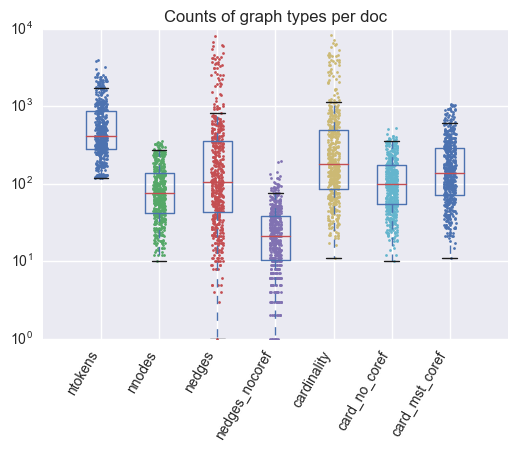

In [54]:
cols = xlabels = ['ntokens', 'nnodes', 'nedges', 'nedges_nocoref', 'cardinality',  'card_no_coref', 'card_mst_coref']
ax = plot_categorical_scatter(corpus_df, cols, graphtype='both',
                              jitter=True, logy=True, 
                              xlabels=xlabels, ha='right', rot=60,
                              title="Counts of graph types per doc")
for c in cols:
    print "Category: {}".format(c)
    print corpus_df[c].describe()
    print

Category: node-value-ann-type-node
count    535.000000
mean       9.953271
std        6.918443
min        1.000000
25%        5.000000
50%        8.000000
75%       13.000000
max       52.000000
Name: node-value-ann-type-node, dtype: float64

Category: edge-relation-ann-type-edge
count    535.000000
mean      12.951402
std       12.716642
min        0.000000
25%        4.000000
50%        9.000000
75%       17.000000
max       86.000000
Name: edge-relation-ann-type-edge, dtype: float64

Category: edge-event-argument-ann-type-edge
count    535.000000
mean      15.315888
std       15.602723
min        0.000000
25%        4.000000
50%       11.000000
75%       21.000000
max      110.000000
Name: edge-event-argument-ann-type-edge, dtype: float64

Category: node-entity-ann-type-node
count    535.000000
mean      82.450467
std       69.052719
min        7.000000
25%       31.500000
50%       57.000000
75%      111.000000
max      314.000000
Name: node-entity-ann-type-node, dtype: float64

Ca

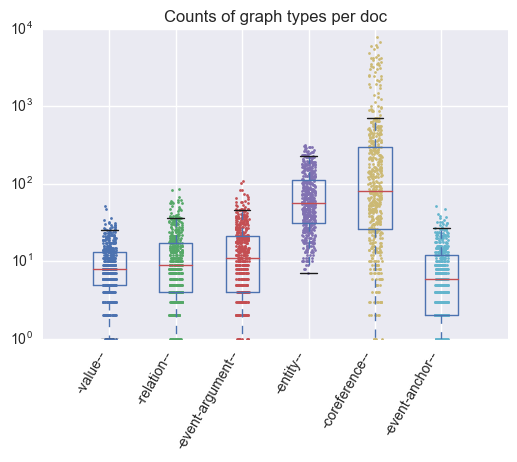

In [55]:
cols = [ c for c in column_name_set if 'ann-type' in c]
xlabels = [ c.replace('edge','').replace('ann-type','').replace('node', '') for c in cols]
ax = plot_categorical_scatter(corpus_df, cols, graphtype='both',
                              jitter=True, logy=True, 
                              xlabels=xlabels, ha='right', rot=60,
                              title="Counts of graph types per doc")
for c in cols:
    print "Category: {}".format(c)
    print corpus_df[c].describe()
    print

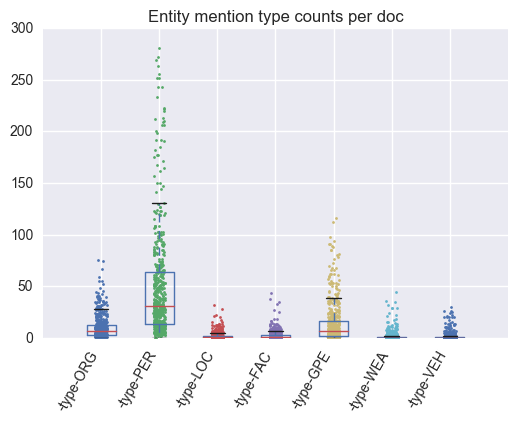

In [56]:
cols = [ c for c in column_name_set 
        if c.startswith('node-entity') 
        and 'Decision' not in c
        and '-type' in c 
        and not 'node-type' in c
        and not 'ann-type' in c]
xlabels = [ c.replace('node-entity','') for c in cols]
ax = plot_categorical_scatter(corpus_df, cols, jitter=True, logy=False, 
                              xlabels=xlabels, rot=60, ha='right', graphtype='both',
                              title="Entity mention type counts per doc")

In [ ]:
cols = [ c for c in column_name_set 
        if c.startswith('node-event') 
        and 'Decision' not in c
        and '-type' in c 
        and not 'node-type' in c
        and not 'ann-type' in c]
xlabels = [ c.replace('node-event-','') for c in cols]
ax = plot_categorical_scatter(corpus_df, cols, jitter=True, logy=False, 
                              xlabels=xlabels, rot=45, ha='right',
                              title="Event anchor type counts per doc")
for c in cols:
    print "Category: {}".format(c)
    print corpus_df[c].describe()
    print

In [ ]:
for c in dists.keys():
    print c, len(dists[c])

# Testing out min-span coref tree statistics

In [ ]:
print zip(*sorted(zip([('a',), ('b',), ('c',)], [1,3,2]), key=lambda x:x[1]))

In [ ]:
# an implementation of Kruskal's algorithm
# taken from http://blog.hguochen.com/programming/greedy%20algorithm/2014/06/17/Kruskal's-Algorithm/

class WeightedGraph:
    """
    Implement a weighted graph that can find the minimum spanning forest
    """
    def __init__(self):
        self.edges = []
        self.node2set = {}
        self.new = True
        self.trees = []

    def add(self, edge, weight):
        """
        Add an edge(defined by 2 vertices in a list) and its corresponding weight to edges
        """
        self.edges.append({'edge':edge, 'weight':weight, 'set':-1})
        self.new = True

    def __kruskal(self):
        # sort edges by increading weight
        self.edges.sort(key=lambda x:x['weight'])
        # assign each node and edge to it's own set to start out with
        all_nodes = set([edge['edge'][0] for edge in self.edges] + [edge['edge'][1] for edge in self.edges])
        self.node2set = { node:i for i, node in enumerate(all_nodes) }
        
        # look at eaach edge from smallest to largest
        for edge in self.edges:
            u, v = edge['edge']
            if self.node2set[u] != self.node2set[v]:
                low_set = min(self.node2set[u], self.node2set[v])
                self.node2set[u] = low_set
                self.node2set[v] = low_set
                edge['set'] = low_set
        
    @property
    def min_span_trees(self):
        # if we haven't done the calculations yet, do them
        if self.new and self.edges:
            self.trees = []
            # find the min span trees
            self.__kruskal()
            # return them as list of lists of edges
            max_i = max([edge['set'] for edge in self.edges])
            for i in range(max_i+1):
                self.trees.append([edge for edge in self.edges if edge['set'] == i])
        return self.trees
        

In [ ]:
coref_mst_dists = []
doc_coref_mst_cards = {}
for i, (docid, annotations) in enumerate(all_annotations.items()):
    print '\r {}'.format(i),
    # get all coref edges
    coref_edges = [edge for edge in annotations['annotations']
                   if edge['ann-type'] == 'edge'
                   and edge['edge-type'] == 'coreference']
    
    print "# edges = ", len(coref_edges)
    # create the weighted graph
    G = WeightedGraph()
    for edge in coref_edges:
        G.add([edge['ann-left'], edge['ann-right']], edge['dist'])
#     print "# G edges = ", len(G.edges)
    
    mst_card = 0
    for tree in G.min_span_trees:
#         print [edge['weight'] for edge in tree]
        mst_card += len(tree)
        coref_mst_dists.extend([edge['weight'] for edge in tree])
    doc_coref_mst_cards[docid] = mst_card
# print coref_mst_dists

In [ ]:
dists['coref_mst'] = coref_mst_dists
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dists.iteritems() ]))
cols = df.columns.tolist()
ax = plot_categorical_scatter(df, cols, jitter=True, logy=True, 
                              xlabels=cols, rot=60, ha='right', graphtype='both',
                              title="Edgetype dists across corpus", alpha=.2)
for c in cols:
    print "Category: {}".format(c)
    print df[c].describe()
    print